In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def nearestneighborAccuracy(data, features):
    #https://www.geeksforgeeks.org/calculate-the-euclidean-distance-using-numpy/
    features = data[features].to_numpy()
    labels = data[0].to_numpy()
    rows = len(data)

    # print(features[0])
    correctClassified = 0
    for i in range(rows):
        # print("Classifying row", i)
        objToClass = features[i]
        objLabels = labels[i]

        #https://numpy.org/doc/2.1/reference/generated/numpy.linalg.norm.html
        distances = np.linalg.norm(features - objToClass, axis = 1)
        distances[i] = np.inf

        #https://stackoverflow.com/questions/2474015/getting-the-index-of-the-returned-max-or-min-item-using-max-min-on-a-list
        nearestNeighborIndex = np.argmin(distances)
        # print("   Nearest Neighbor is row", nearestNeighborIndex)
        if labels[i] == labels[nearestNeighborIndex]:
            correctClassified += 1

    # print("Correctly Classified", correctClassified)
    # print("Accuracy =", correctClassified/rows)
    return correctClassified/rows

In [4]:
def forwardSelection(data, features):
    # Start with an empty set of features
    currentSelection = []
    accuracies = []
    # unselectedFeatures = features
    unselectedFeatures = list(features)

    # Add one feature at a time to current set of features
    # All features will be added once
    for i in range(len(features)):
        iterAccuracies = []
        iterFeatures = []

        # Try adding one feature at a time to current sent of features
        for feature in unselectedFeatures:
            featuresToTest = currentSelection + [feature]
            accuracy = nearestneighborAccuracy(data, featuresToTest)
            iterAccuracies.append(accuracy)
            iterFeatures.append(feature)

        # Pick the added feature that has the highest accuracy
        maxAccIndex = np.argmax(iterAccuracies)
        maxFeature = iterFeatures[maxAccIndex]
        accuracies.append(iterAccuracies[maxAccIndex])

        # Add highest accuracy feature of current iteration to current set of features
        currentSelection.append(maxFeature)
        # unselectedFeatures.delete(maxFeature)
        unselectedFeatures.remove(maxFeature)

        print("Highest accuracy is", iterAccuracies[maxAccIndex])
        print("   Obtained by adding", maxFeature)
        print("   Our current selection is now", currentSelection)

    return currentSelection, accuracies

In [13]:
def backwardSelection(data, features):
    # Start with all of the features
    currentSelection = list(features)
    accuracies = []
    # unselectedFeatures = features
    unselectedFeatures = list(features)

    removeOrder = []

    # Renive one feature at a time to current set of features
    # All features will be removed once
    for i in range(len(features)):
        iterAccuracies = []
        iterFeatures = []

        # Try removing one feature at a time to current sent of features
        for feature in unselectedFeatures:
            # print(feature)
            featuresToTest = currentSelection.copy()
            featuresToTest.remove(feature)
            # print(featuresToTest)
            accuracy = nearestneighborAccuracy(data, featuresToTest)
            iterAccuracies.append(accuracy)
            iterFeatures.append(feature)

        # Pick the added feature that has the highest accuracy
        maxAccIndex = np.argmax(iterAccuracies)
        maxFeature = iterFeatures[maxAccIndex]
        accuracies.append(iterAccuracies[maxAccIndex])

        # Add highest accuracy feature of current iteration to current set of features
        currentSelection.remove(maxFeature)
        # unselectedFeatures.delete(maxFeature)
        removeOrder.append(maxFeature)
        unselectedFeatures.remove(maxFeature)

        print("Highest accuracy is", iterAccuracies[maxAccIndex])
        print("   Obtained by removing", maxFeature)
        print("   Our current selection is now", currentSelection)

    return currentSelection, accuracies, removeOrder

In [6]:
dfLarge = pd.read_fwf("CS205_large_Data__45.txt", header=None)

In [7]:
dfSmall = pd.read_fwf("CS205_small_Data__22.txt", header=None)

In [30]:
currentSelectionLF, accuraciesLF = forwardSelection(dfLarge, dfLarge.columns[1:])
currentSelectionLB, accuraciesLB, removeOrderLB = backwardSelection(dfLarge, dfLarge.columns[1:])

Highest accuracy is 0.843
   Obtained by adding 4
   Our current selection is now [4]
Highest accuracy is 0.958
   Obtained by adding 39
   Our current selection is now [4, 39]
Highest accuracy is 0.949
   Obtained by adding 28
   Our current selection is now [4, 39, 28]
Highest accuracy is 0.918
   Obtained by adding 43
   Our current selection is now [4, 39, 28, 43]
Highest accuracy is 0.892
   Obtained by adding 21
   Our current selection is now [4, 39, 28, 43, 21]
Highest accuracy is 0.877
   Obtained by adding 40
   Our current selection is now [4, 39, 28, 43, 21, 40]
Highest accuracy is 0.855
   Obtained by adding 44
   Our current selection is now [4, 39, 28, 43, 21, 40, 44]
Highest accuracy is 0.831
   Obtained by adding 30
   Our current selection is now [4, 39, 28, 43, 21, 40, 44, 30]
Highest accuracy is 0.828
   Obtained by adding 41
   Our current selection is now [4, 39, 28, 43, 21, 40, 44, 30, 41]
Highest accuracy is 0.822
   Obtained by adding 15
   Our current selectio

In [14]:
currentSelectionSF, accuraciesSF = forwardSelection(dfSmall, dfSmall.columns[1:])
currentSelectionSB, accuraciesSB, removeOrderSB = backwardSelection(dfSmall, dfSmall.columns[1:])

Highest accuracy is 0.842
   Obtained by adding 2
   Our current selection is now [2]
Highest accuracy is 0.97
   Obtained by adding 8
   Our current selection is now [2, 8]
Highest accuracy is 0.944
   Obtained by adding 6
   Our current selection is now [2, 8, 6]
Highest accuracy is 0.938
   Obtained by adding 4
   Our current selection is now [2, 8, 6, 4]
Highest accuracy is 0.896
   Obtained by adding 3
   Our current selection is now [2, 8, 6, 4, 3]
Highest accuracy is 0.87
   Obtained by adding 9
   Our current selection is now [2, 8, 6, 4, 3, 9]
Highest accuracy is 0.852
   Obtained by adding 1
   Our current selection is now [2, 8, 6, 4, 3, 9, 1]
Highest accuracy is 0.838
   Obtained by adding 7
   Our current selection is now [2, 8, 6, 4, 3, 9, 1, 7]
Highest accuracy is 0.804
   Obtained by adding 10
   Our current selection is now [2, 8, 6, 4, 3, 9, 1, 7, 10]
Highest accuracy is 0.778
   Obtained by adding 12
   Our current selection is now [2, 8, 6, 4, 3, 9, 1, 7, 10, 12]
Hi

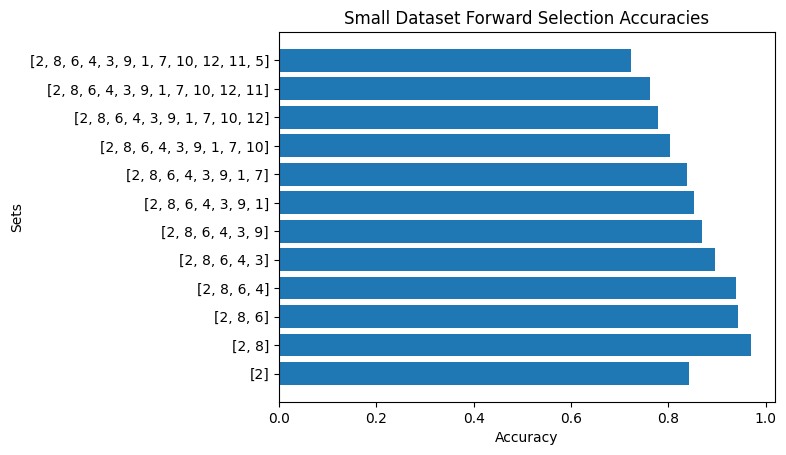

In [31]:
# https://www.geeksforgeeks.org/bar-plot-in-matplotlib/
sets = []
prev = []
for feature in currentSelectionSF:
  prev.append(feature)
  sets.append(str(prev))

plt.barh(sets, accuraciesSF)
plt.title('Small Dataset Forward Selection Accuracies')
plt.xlabel('Accuracy')
plt.ylabel('Sets')
plt.show()

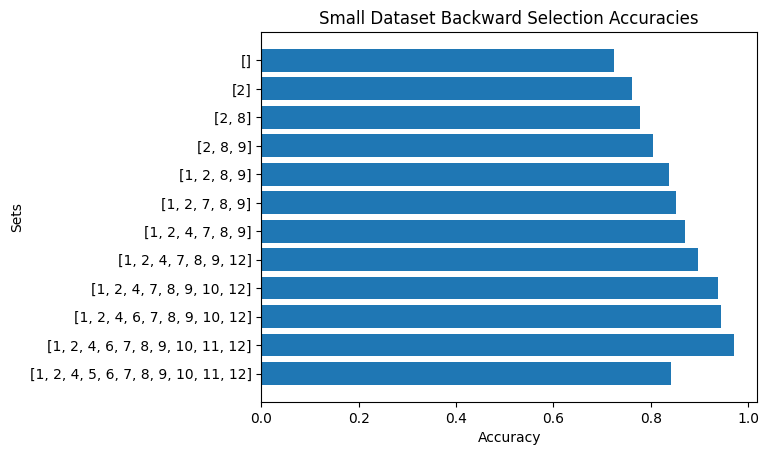

In [32]:
# https://www.geeksforgeeks.org/bar-plot-in-matplotlib/
sets = []
prev = list(dfSmall.columns[1:])
for feature in removeOrderSB:
  prev.remove(feature)
  sets.append(str(prev))

plt.barh(sets, accuraciesSF)
plt.title('Small Dataset Backward Selection Accuracies')
plt.xlabel('Accuracy')
plt.ylabel('Sets')
plt.show()

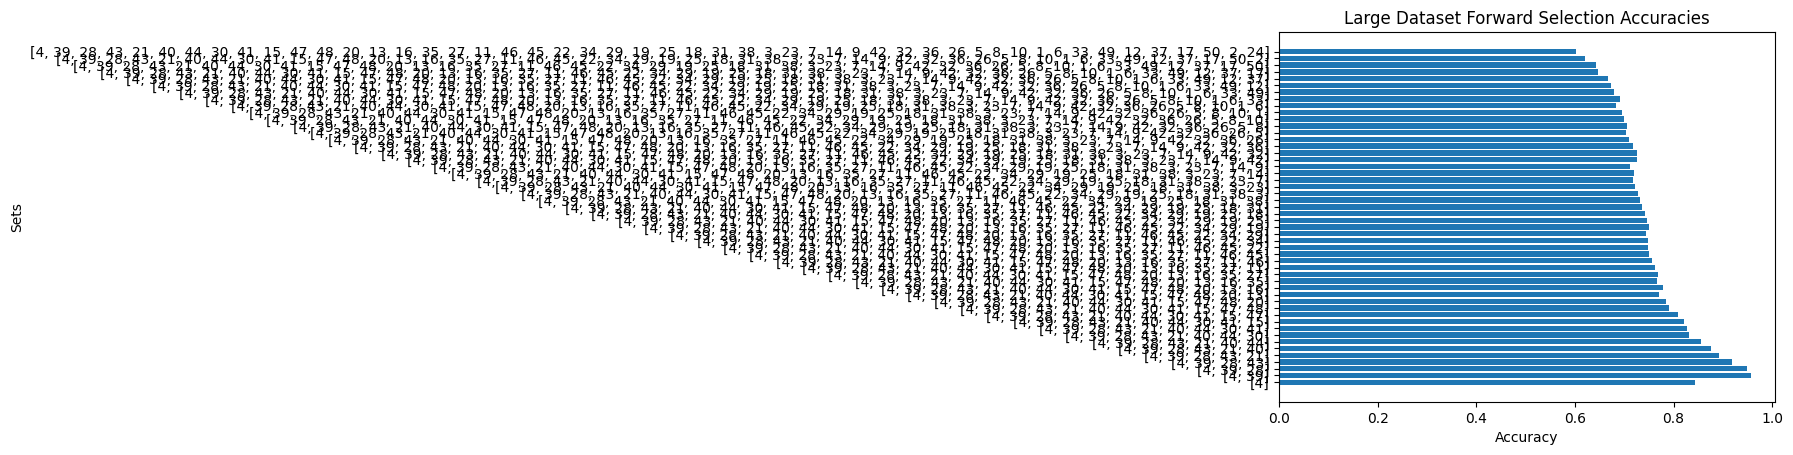

In [33]:
sets = []
prev = []
for feature in currentSelectionLF:
  prev.append(feature)
  sets.append(str(prev))

plt.barh(sets, accuraciesLF)
plt.title('Large Dataset Forward Selection Accuracies')
plt.xlabel('Accuracy')
plt.ylabel('Sets')
plt.show()

In [36]:
print(currentSelectionLF)
print(accuraciesLF)

[4, 39, 28, 43, 21, 40, 44, 30, 41, 15, 47, 48, 20, 13, 16, 35, 27, 11, 46, 45, 22, 34, 29, 19, 25, 18, 31, 38, 3, 23, 7, 14, 9, 42, 32, 36, 26, 5, 8, 10, 1, 6, 33, 49, 12, 37, 17, 50, 2, 24]
[0.843, 0.958, 0.949, 0.918, 0.892, 0.877, 0.855, 0.831, 0.828, 0.822, 0.81, 0.79, 0.785, 0.77, 0.779, 0.766, 0.769, 0.763, 0.756, 0.75, 0.748, 0.748, 0.745, 0.751, 0.746, 0.743, 0.736, 0.733, 0.727, 0.721, 0.718, 0.719, 0.712, 0.725, 0.725, 0.717, 0.709, 0.703, 0.706, 0.699, 0.696, 0.684, 0.692, 0.679, 0.674, 0.667, 0.647, 0.643, 0.62, 0.602]


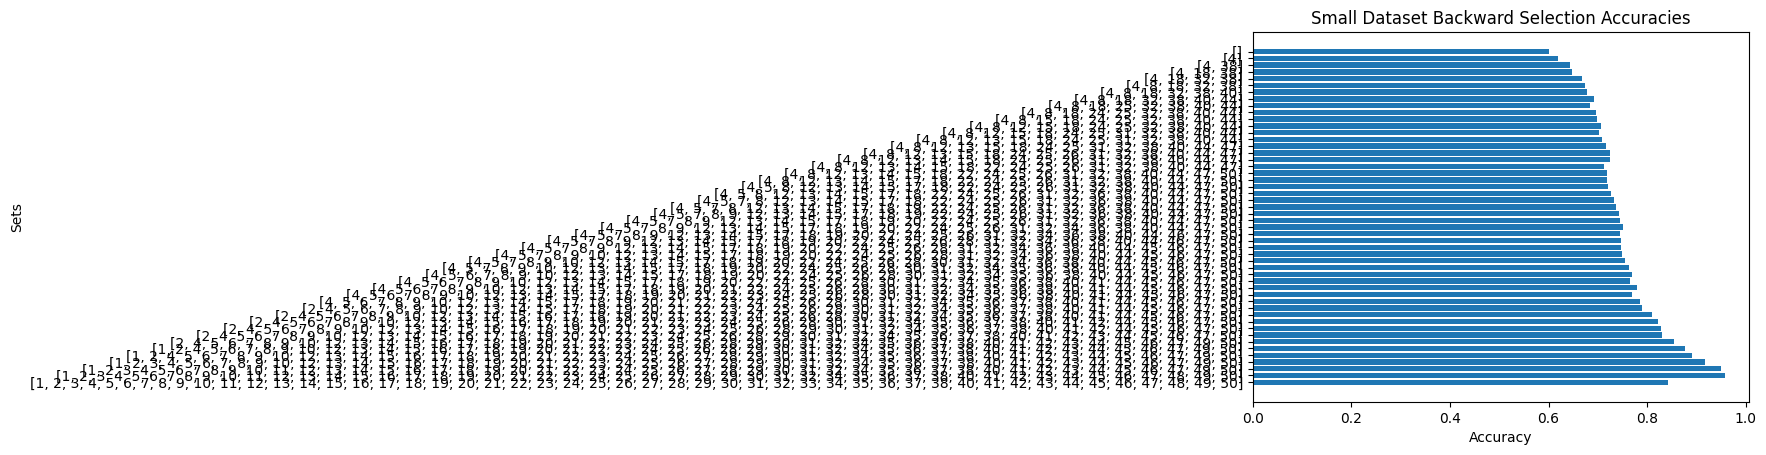

In [34]:
sets = []
prev = list(dfLarge.columns[1:])
for feature in removeOrderLB:
  prev.remove(feature)
  sets.append(str(prev))

plt.barh(sets, accuraciesLF)
plt.title('Small Dataset Backward Selection Accuracies')
plt.xlabel('Accuracy')
plt.ylabel('Sets')
plt.show()

In [37]:
print(removeOrderLB)
print(accuraciesLF)

[39, 33, 48, 11, 3, 27, 1, 49, 43, 29, 42, 16, 2, 37, 23, 21, 41, 6, 35, 30, 10, 45, 28, 46, 34, 20, 9, 19, 7, 36, 5, 17, 50, 22, 14, 26, 47, 13, 31, 12, 15, 24, 25, 44, 40, 8, 32, 18, 38, 4]
[0.843, 0.958, 0.949, 0.918, 0.892, 0.877, 0.855, 0.831, 0.828, 0.822, 0.81, 0.79, 0.785, 0.77, 0.779, 0.766, 0.769, 0.763, 0.756, 0.75, 0.748, 0.748, 0.745, 0.751, 0.746, 0.743, 0.736, 0.733, 0.727, 0.721, 0.718, 0.719, 0.712, 0.725, 0.725, 0.717, 0.709, 0.703, 0.706, 0.699, 0.696, 0.684, 0.692, 0.679, 0.674, 0.667, 0.647, 0.643, 0.62, 0.602]


In [69]:
#https://archive.ics.uci.edu/dataset/1/abalone
columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight']
dfAbal = pd.read_csv('abalone.data', header=None)

In [70]:
dfAbal = dfAbal.drop(8, axis = 1)

In [71]:
dfAbal

,0,1,2,3,4,5,6,7
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [74]:
currentSelectionAbalF, accuraciesAbalF = forwardSelection(dfAbal, dfAbal.columns[1:])
currentSelectionAbalB, accuraciesAbalB, removeOrderAbalB = backwardSelection(dfAbal, dfAbal.columns[1:])

Highest accuracy is 0.4548719176442423
   Obtained by adding 7
   Our current selection is now [7]
Highest accuracy is 0.46396935599712713
   Obtained by adding 4
   Our current selection is now [7, 4]
Highest accuracy is 0.4852765142446732
   Obtained by adding 1
   Our current selection is now [7, 4, 1]
Highest accuracy is 0.4950921714148911
   Obtained by adding 3
   Our current selection is now [7, 4, 1, 3]
Highest accuracy is 0.5017955470433325
   Obtained by adding 6
   Our current selection is now [7, 4, 1, 3, 6]
Highest accuracy is 0.5025137658606655
   Obtained by adding 5
   Our current selection is now [7, 4, 1, 3, 6, 5]
Highest accuracy is 0.5046684223126646
   Obtained by adding 2
   Our current selection is now [7, 4, 1, 3, 6, 5, 2]
Highest accuracy is 0.5061048599473306
   Obtained by removing 3
   Our current selection is now [1, 2, 4, 5, 6, 7]
Highest accuracy is 0.5034713909504429
   Obtained by removing 6
   Our current selection is now [1, 2, 4, 5, 7]
Highest accura

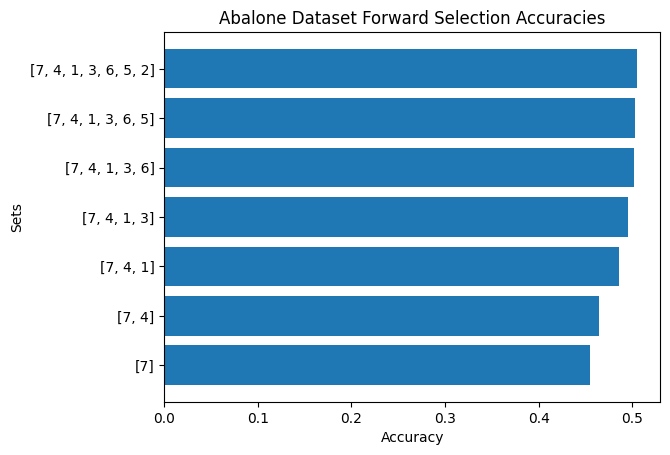

In [73]:
sets = []
prev = []
for feature in currentSelectionAbalF:
  prev.append(feature)
  sets.append(str(prev))

plt.barh(sets, accuraciesAbalF)
plt.title('Abalone Dataset Forward Selection Accuracies')
plt.xlabel('Accuracy')
plt.ylabel('Sets')
plt.show()

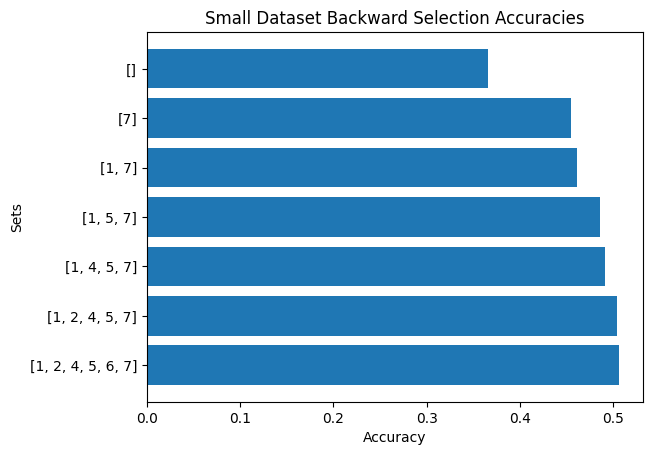

In [76]:
sets = []
prev = list(dfAbal.columns[1:])
for feature in removeOrderAbalB:
  prev.remove(feature)
  sets.append(str(prev))

plt.barh(sets, accuraciesAbalB)
plt.title('Abalone Dataset Backward Selection Accuracies')
plt.xlabel('Accuracy')
plt.ylabel('Sets')
plt.show()